In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 'fashion-mnist_test.csv']


In [2]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
train = pd.read_csv("../input/fashion-mnist_train.csv") 
X_test = pd.read_csv("../input/fashion-mnist_test.csv")

In [3]:
X_train = train.drop(labels = ['label'], axis=1)
y_train = train['label']

In [4]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [6]:
print(X_train.shape)

(60000, 784)


In [7]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [8]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [9]:
# Subset first 20k data points to visualize
x_subset = X_train[0:20000]
y_subset = y_train[0:20000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 1.1994929313659668 seconds


In [11]:
pca_result.shape

(20000, 4)

In [12]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29065938 0.17621136 0.06019516 0.04997166]


(<Figure size 576x576 with 1 Axes>,
 [Text(870.5994685015165, -673.7586911364938, '0'),
  Text(55.13042693170982, -1417.5241576855638, '1'),
  Text(1068.601137451716, 411.08401837374595, '2'),
  Text(357.9715550936314, -1111.6048401539038, '3'),
  Text(1220.1152670325255, 332.0178609190145, '4'),
  Text(-1583.860518062507, 73.10077273117906, '5'),
  Text(691.6978264494727, -19.870820040554268, '6'),
  Text(-1528.7128141487035, 315.3713280332922, '7'),
  Text(-13.80431509003407, 954.5454664605857, '8'),
  Text(-640.0680169406204, 1131.4938532015008, '9')])

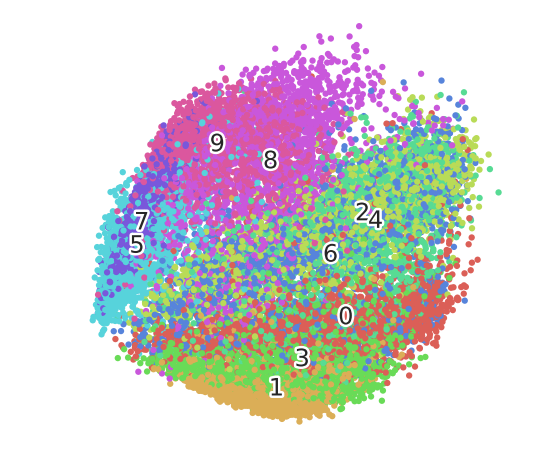

In [13]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

In [14]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1096.14715218544 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-40.43801, -27.028053, '0'),
  Text(37.799274, 44.047787, '1'),
  Text(-5.1959004, 41.91438, '2'),
  Text(-42.021095, -2.0525465, '3'),
  Text(-23.109596, 40.418556, '4'),
  Text(25.220829, -30.85494, '5'),
  Text(-16.538918, 21.027094, '6'),
  Text(33.650322, -52.647552, '7'),
  Text(-6.58759, -35.054756, '8'),
  Text(50.79504, -0.055747744, '9')])

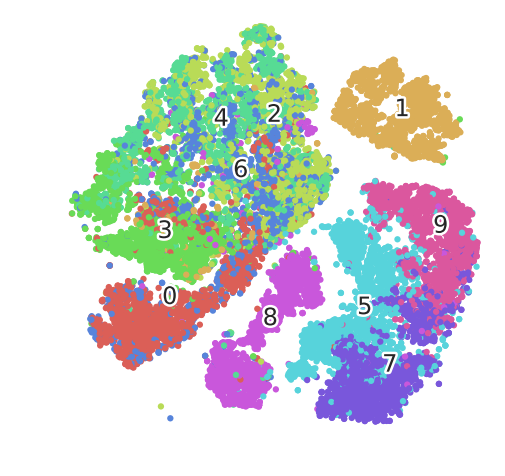

In [15]:
fashion_scatter(fashion_tsne, y_subset)

In [16]:
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 1.8333752155303955 seconds
Cumulative variance explained by 50 principal components: 0.8629055120324554


In [17]:
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 244.20478296279907 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-32.26816, -41.91709, '0'),
  Text(-19.741285, 65.22204, '1'),
  Text(-6.295567, 20.949217, '2'),
  Text(-55.231857, -6.5904117, '3'),
  Text(-17.956472, 27.817926, '4'),
  Text(37.901703, -19.805458, '5'),
  Text(-17.204119, 3.8419323, '6'),
  Text(49.277954, -42.59271, '7'),
  Text(6.248331, -24.379723, '8'),
  Text(58.41228, 20.367079, '9')])

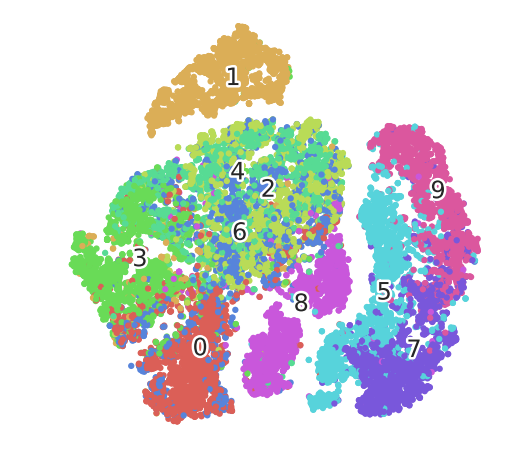

In [18]:
fashion_scatter(fashion_pca_tsne, y_subset)